### In the monkey's behavioral data, how well is belief state value predicted by past reward?
Build a regression model with
$$ V(t) = \sum_i^K \beta_i  r_{t - i}

In [13]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import utils.spike_utils as spike_utils
from constants.glm_constants import *
from constants.behavioral_constants import *
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
from scipy import stats
import warnings
from scipy.ndimage import gaussian_filter1d
import seaborn as sns

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Just try with one session first

In [14]:
session = "20180802"
behavior_path = SESS_BEHAVIOR_PATH.format(sess_name=session)
beh = pd.read_csv(behavior_path)

# filter trials 
beh = behavioral_utils.get_valid_trials(beh)
feature_selections = behavioral_utils.get_selection_features(beh)
beh = pd.merge(beh, feature_selections, on="TrialNumber", how="inner")
beh = behavioral_utils.get_beliefs_per_session(beh, session)

In [3]:
past_steps = 10

In [15]:
for i in range(past_steps):
    prev_num = i + 1
    beh[f"Prev{prev_num}"] = beh.Response.shift(prev_num).apply(lambda x: 1 if x == "Correct" else -1)
    # beh[f"CorrectPrev{prev_num}"] = beh.Response.shift(prev_num).apply(lambda x: 1 if x == "Correct" else 0)
    # beh[f"IncorrectPrev{prev_num}"] = beh.Response.shift(prev_num).apply(lambda x: 0 if x == "Incorrect" else 0)

In [16]:
from sklearn.linear_model import LinearRegression

# cor_feats = beh[[f"CorrectPrev{i+1}" for i in range(past_steps)]].values
# inc_feats = beh[[f"IncorrectPrev{i+1}" for i in range(past_steps)]].values
# X = np.hstack([cor_feats, inc_feats])
X = beh[[f"Prev{i+1}" for i in range(past_steps)]].values

Y = beh.BeliefStateValue.values

reg = LinearRegression().fit(X, Y)

In [17]:
reg.score(X, Y)

0.6985337739053248

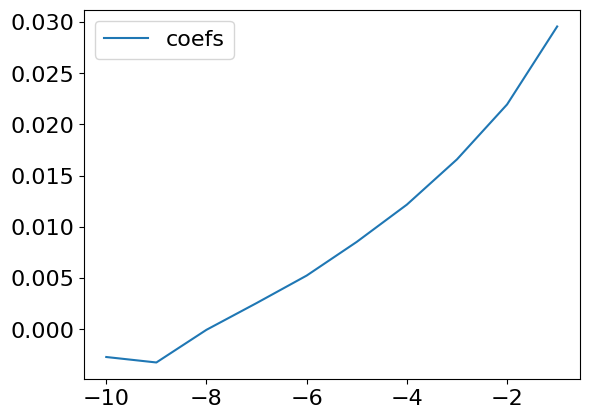

In [18]:
# cor_coefs = np.flip(reg.coef_[:past_steps])
# inc_coefs = np.flip(reg.coef_[past_steps:])
# x = np.arange(- past_steps, 0)
# fig, ax = plt.subplots()
# ax.plot(x, cor_coefs, label="cor coefs")
# ax.plot(x, inc_coefs, label="inc coefs")
# ax.legend()

coefs = np.flip(reg.coef_)
x = np.arange(- past_steps, 0)
fig, ax = plt.subplots()
ax.plot(x, coefs, label="coefs")
ax.legend()

In [44]:
cor_coefs

array([0.02964634, 0.03694684, 0.04793444, 0.06267378])